## Preparing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import time
import math
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
!gdown https://drive.google.com/uc?id=15j64TKndj7Yw1ixiw1DS7XmyByLIgoFt

Downloading...
From: https://drive.google.com/uc?id=15j64TKndj7Yw1ixiw1DS7XmyByLIgoFt
To: /content/INFY.csv
100% 228k/228k [00:00<00:00, 70.6MB/s]


In [ ]:
df = pd.read_csv('INFY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2004,3.023750,3.141563,2.992188,3.103125,2.222448,13360000
1,05-01-2004,3.142500,3.203125,3.132813,3.165625,2.267211,12140800
2,06-01-2004,3.130313,3.171875,3.076563,3.135938,2.245949,10416000
3,07-01-2004,3.167188,3.181250,3.048438,3.124375,2.237667,11984000
4,08-01-2004,3.156250,3.193125,3.065313,3.080625,2.206333,13427200


In [ ]:
df = df.dropna()

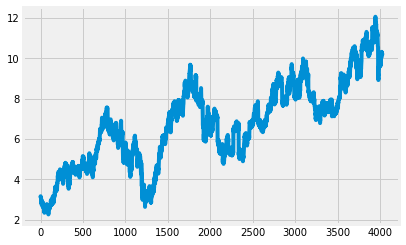

In [ ]:
plt.plot(df['Close'])

In [ ]:
df_new = pd.read_csv('INFY.csv', index_col='Date', parse_dates=True)
df_new.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-02-01,3.023750,3.141563,2.992188,3.103125,2.222448,13360000
2004-05-01,3.142500,3.203125,3.132813,3.165625,2.267211,12140800
2004-06-01,3.130313,3.171875,3.076563,3.135938,2.245949,10416000
2004-07-01,3.167188,3.181250,3.048438,3.124375,2.237667,11984000
2004-08-01,3.156250,3.193125,3.065313,3.080625,2.206333,13427200


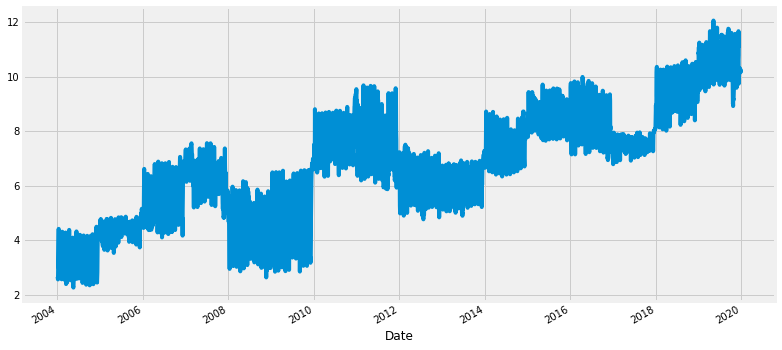

In [ ]:
df_new['Close'].plot(figsize=(12,6))

In [ ]:
df = df['Close']
df.head()

0    3.103125
1    3.165625
2    3.135938
3    3.124375
4    3.080625
Name: Close, dtype: float64

In [ ]:
# scaling close

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

print(df)

[[0.08550845]
 [0.09188254]
 [0.0888549 ]
 ...
 [0.80622748]
 [0.81540618]
 [0.80520763]]


## Training and Testing

In [ ]:
length_train = 3774
train_data = df[:length_train,:] # training data from 2004-2018
test_data = df[length_train:,: ] # testing data on 2019

In [ ]:
train_data.shape, test_data.shape

((3774, 1), (252, 1))

In [ ]:
len(train_data), len(test_data)

(3774, 252)

In [ ]:
# convert an array of values into a dataset matrix

def sliding_window(records, time_step):
	dataX, dataY = [], []
	for i in range(len(records)-time_step-1):
		a = records[i:(i+time_step), 0]   # for i=0: xtrain: 0 to 74 ytrain:75, for i=1: xtrain: 1 to 75 ytrain:76, like this do till train set is over
		dataX.append(a)
		dataY.append(records[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 75
X_train, y_train = sliding_window(train_data, time_step)
X_test, y_test = sliding_window(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape

((3698, 75), (3698,))

In [ ]:
X_test.shape, y_test.shape

((176, 75), (176,))

In [ ]:
X_train

array([[0.08550845, 0.09188254, 0.0888549 , ..., 0.03955121, 0.05108833,
        0.04423623],
       [0.09188254, 0.0888549 , 0.08767564, ..., 0.05108833, 0.04423623,
        0.0424833 ],
       [0.0888549 , 0.08767564, 0.08321377, ..., 0.04423623, 0.0424833 ,
        0.04946298],
       ...,
       [0.82968415, 0.83223379, 0.82458488, ..., 0.73075818, 0.71546035,
        0.69710296],
       [0.83223379, 0.82458488, 0.83835293, ..., 0.71546035, 0.69710296,
        0.69506325],
       [0.82458488, 0.83835293, 0.84498199, ..., 0.69710296, 0.69506325,
        0.72565891]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)   # last parameter is adding 1
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [ ]:
print(X_train.shape, X_test.shape)

(3698, 75, 1) (176, 75, 1)


In [ ]:
X_train

array([[[0.08550845],
        [0.09188254],
        [0.0888549 ],
        ...,
        [0.03955121],
        [0.05108833],
        [0.04423623]],

       [[0.09188254],
        [0.0888549 ],
        [0.08767564],
        ...,
        [0.05108833],
        [0.04423623],
        [0.0424833 ]],

       [[0.0888549 ],
        [0.08767564],
        [0.08321377],
        ...,
        [0.04423623],
        [0.0424833 ],
        [0.04946298]],

       ...,

       [[0.82968415],
        [0.83223379],
        [0.82458488],
        ...,
        [0.73075818],
        [0.71546035],
        [0.69710296]],

       [[0.83223379],
        [0.82458488],
        [0.83835293],
        ...,
        [0.71546035],
        [0.69710296],
        [0.69506325]],

       [[0.82458488],
        [0.83835293],
        [0.84498199],
        ...,
        [0.69710296],
        [0.69506325],
        [0.72565891]]])

In [ ]:
y_train

array([0.0424833 , 0.04946298, 0.0494948 , ..., 0.69506325, 0.72565891,
       0.7327979 ])

## Using Simple RNN

In [ ]:
rnnmodel = Sequential()
rnnmodel.add(SimpleRNN(256, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))     # i/p layer shape is 75,1 like X_train
rnnmodel.add(Dropout(0.2))
rnnmodel.add(SimpleRNN(128, activation='tanh'))
rnnmodel.add(Dropout(0.2))
rnnmodel.add(Dense(1))                                               # output layer
rnnmodel.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
rnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 75, 256)           66048     
_________________________________________________________________
dropout (Dropout)            (None, 75, 256)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               49280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 115,457
Trainable params: 115,457
Non-trainable params: 0
_________________________________________________________________


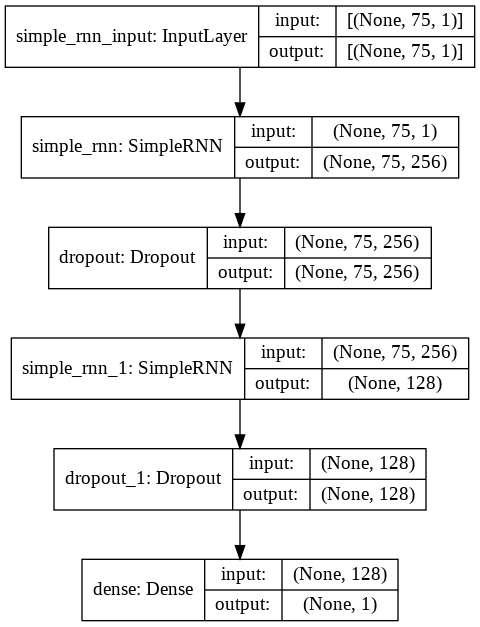

In [ ]:
plot_model(rnnmodel, show_shapes=True, show_layer_names=True)

In [ ]:
start = time.time()

history = rnnmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# use verbose to display progress
end = time.time()
print("Time taken to run in seconds: ", end - start)

Epoch 1/100
58/58 [==============================] - 12s 138ms/step - loss: 0.2720 - val_loss: 0.0013
Epoch 2/100
58/58 [==============================] - 7s 128ms/step - loss: 0.0164 - val_loss: 0.0014
Epoch 3/100
58/58 [==============================] - 7s 127ms/step - loss: 0.0090 - val_loss: 8.0407e-04
Epoch 4/100
58/58 [==============================] - 7s 128ms/step - loss: 0.0062 - val_loss: 0.0011
Epoch 5/100
58/58 [==============================] - 7s 128ms/step - loss: 0.0050 - val_loss: 8.1203e-04
Epoch 6/100
58/58 [==============================] - 7s 127ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 7/100
58/58 [==============================] - 7s 128ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 8/100
58/58 [==============================] - 7s 129ms/step - loss: 0.0035 - val_loss: 8.8999e-04
Epoch 9/100
58/58 [==============================] - 7s 127ms/step - loss: 0.0032 - val_loss: 7.8545e-04
Epoch 10/100
58/58 [==============================] - 8s 131ms/step - loss

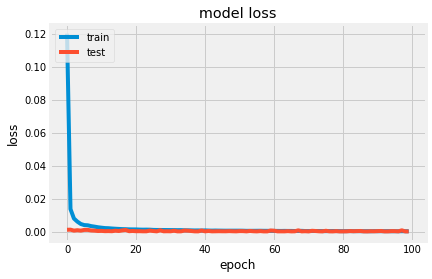

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = rnnmodel.predict(X_test)

In [ ]:
print('RMSE Score: ', round(math.sqrt(mean_squared_error(y_test, y_pred)), 4))

RMSE Score:  0.018


([], <a list of 0 Text major ticklabel objects>)

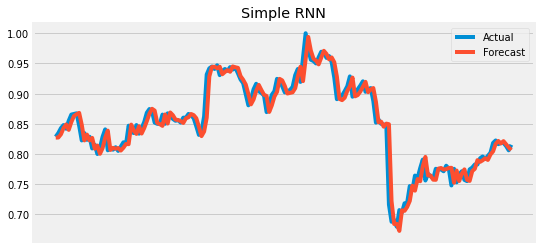

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('Simple RNN')
plt.legend()
plt.xticks([])

In [ ]:
y_pred1 = scaler.inverse_transform(y_pred)

In [ ]:
y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
print('RMSE Score: ', round(math.sqrt(mean_squared_error(y_test1, y_pred1)), 4))

RMSE Score:  0.1763


([], <a list of 0 Text major ticklabel objects>)

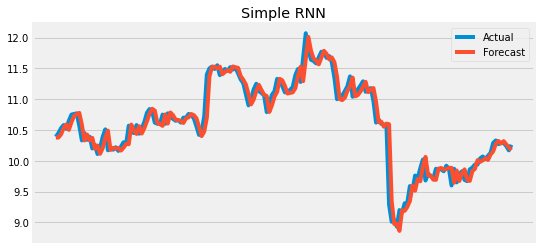

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test1, label = 'Actual')
plt.plot(y_pred1, label = 'Forecast')
plt.title('Simple RNN')
plt.legend()
plt.xticks([])

## Using GRU

In [ ]:
grumodel = Sequential()
grumodel.add(GRU(256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))     # i/p layer shape is 75,1 like X_train
grumodel.add(Dropout(0.2))
grumodel.add(GRU(128, activation='relu'))
grumodel.add(Dropout(0.2))
grumodel.add(Dense(1))                                               # output layer
grumodel.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
grumodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 75, 256)           198912    
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 256)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


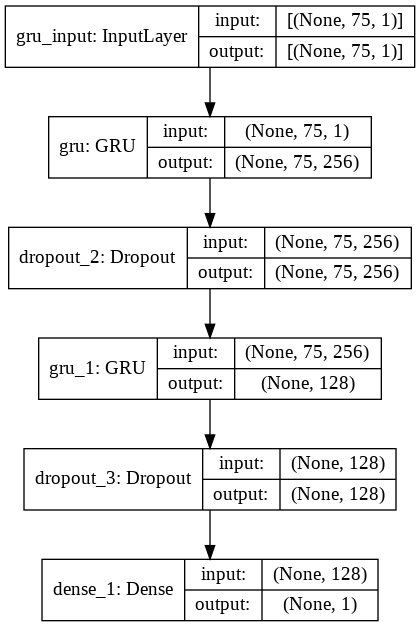

In [ ]:
plot_model(grumodel, show_shapes=True, show_layer_names=True)

In [ ]:
start = time.time()

history = grumodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# use verbose to display progress
end = time.time()
print("Time taken to run in seconds: ", end - start)

Epoch 1/100
58/58 [==============================] - 24s 373ms/step - loss: 0.0516 - val_loss: 8.8258e-04
Epoch 2/100
58/58 [==============================] - 21s 363ms/step - loss: 0.0022 - val_loss: 8.5744e-04
Epoch 3/100
58/58 [==============================] - 21s 362ms/step - loss: 0.0020 - val_loss: 8.2452e-04
Epoch 4/100
58/58 [==============================] - 21s 364ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/100
58/58 [==============================] - 21s 366ms/step - loss: 0.0018 - val_loss: 8.2150e-04
Epoch 6/100
58/58 [==============================] - 21s 367ms/step - loss: 0.0016 - val_loss: 7.4375e-04
Epoch 7/100
58/58 [==============================] - 21s 359ms/step - loss: 0.0015 - val_loss: 7.4784e-04
Epoch 8/100
58/58 [==============================] - 21s 362ms/step - loss: 0.0015 - val_loss: 6.9124e-04
Epoch 9/100
58/58 [==============================] - 21s 364ms/step - loss: 0.0016 - val_loss: 6.7583e-04
Epoch 10/100
58/58 [==============================

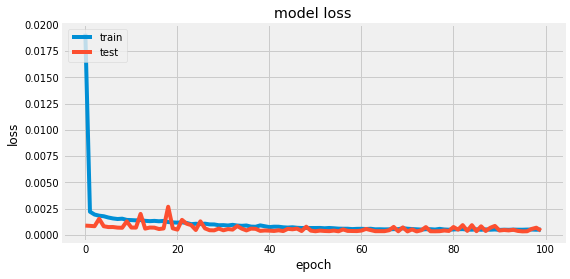

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = grumodel.predict(X_test)

In [ ]:
print('RMSE Score: ', round(math.sqrt(mean_squared_error(y_test, y_pred)), 4))

RMSE Score:  0.0202


([], <a list of 0 Text major ticklabel objects>)

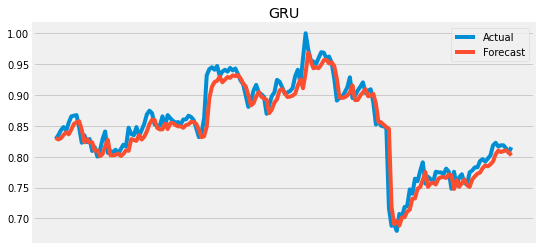

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('GRU')
plt.legend()
plt.xticks([])

In [ ]:
y_pred1 = scaler.inverse_transform(y_pred)

In [ ]:
y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
print('RMSE Score: ', round(math.sqrt(mean_squared_error(y_test1, y_pred1)), 4))

RMSE Score:  0.1982


([], <a list of 0 Text major ticklabel objects>)

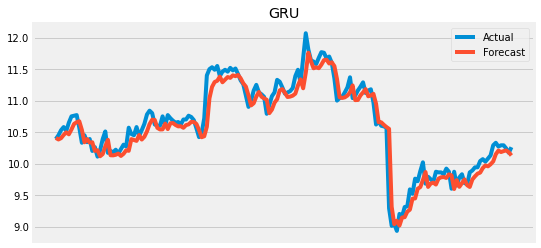

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test1, label = 'Actual')
plt.plot(y_pred1, label = 'Forecast')
plt.title('GRU')
plt.legend()
plt.xticks([])

## Using Stacked LSTM

In [ ]:
# 1st hidden layer is 256
# return_sequences=True which determines whether to return the last output in the output sequence
# input_shape as the shape of our training set

# Calling functions:
# Sequential for initializing the neural network
# Dense for adding a densely connected neural network layer
# LSTM for adding the Long Short-Term Memory layer

lstmmodel = Sequential()
lstmmodel.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))     # i/p layer shape is 75,1 like X_train
#lstmmodel.add(Dropout(0.2))
lstmmodel.add(LSTM(128))
#lstmmodel.add(Dropout(0.2))
lstmmodel.add(Dense(1))                                               # output layer
lstmmodel.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
lstmmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 75, 256)           264192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


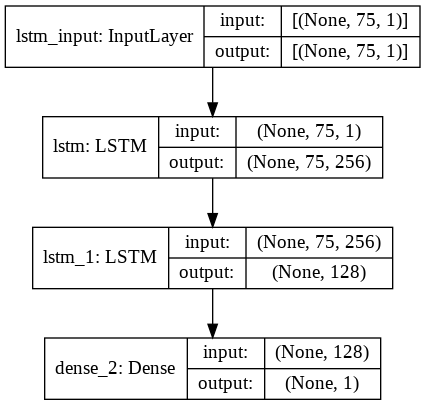

In [ ]:
plot_model(lstmmodel, show_shapes=True, show_layer_names=True)

In [ ]:
start = time.time()

history = lstmmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# use verbose to display progress
end = time.time()
print("Time taken to run in seconds: ", end - start)

Epoch 1/100
58/58 [==============================] - 33s 54ms/step - loss: 0.0293 - val_loss: 0.0015
Epoch 2/100
58/58 [==============================] - 2s 39ms/step - loss: 6.9704e-04 - val_loss: 0.0014
Epoch 3/100
58/58 [==============================] - 2s 38ms/step - loss: 6.8193e-04 - val_loss: 0.0013
Epoch 4/100
58/58 [==============================] - 2s 38ms/step - loss: 5.8980e-04 - val_loss: 0.0012
Epoch 5/100
58/58 [==============================] - 2s 38ms/step - loss: 5.6750e-04 - val_loss: 0.0012
Epoch 6/100
58/58 [==============================] - 2s 38ms/step - loss: 5.0671e-04 - val_loss: 0.0011
Epoch 7/100
58/58 [==============================] - 2s 38ms/step - loss: 5.5878e-04 - val_loss: 0.0012
Epoch 8/100
58/58 [==============================] - 2s 39ms/step - loss: 5.7715e-04 - val_loss: 9.9423e-04
Epoch 9/100
58/58 [==============================] - 2s 38ms/step - loss: 5.1086e-04 - val_loss: 9.6983e-04
Epoch 10/100
58/58 [==============================] - 2s 38

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


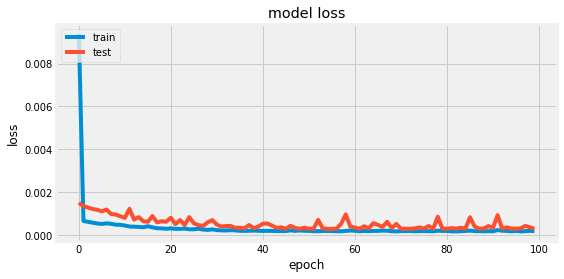

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = lstmmodel.predict(X_test)

In [ ]:
print('RMSE Score: ', round(math.sqrt(mean_squared_error(y_test, y_pred)), 4))

RMSE Score:  0.0175


([], <a list of 0 Text major ticklabel objects>)

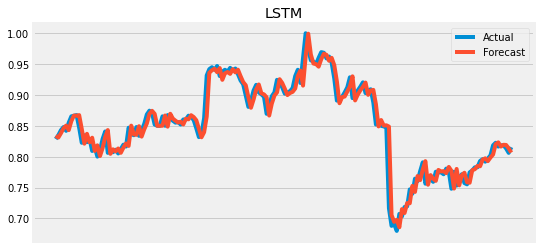

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('LSTM')
plt.legend()
plt.xticks([])

In [ ]:
y_pred1 = scaler.inverse_transform(y_pred)

In [ ]:
y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
print('RMSE Score: ', round(math.sqrt(mean_squared_error(y_test1, y_pred1)), 4))

RMSE Score:  0.1713


([], <a list of 0 Text major ticklabel objects>)

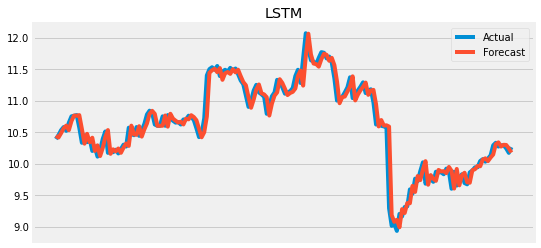

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test1, label = 'Actual')
plt.plot(y_pred1, label = 'Forecast')
plt.title('LSTM')
plt.legend()
plt.xticks([])

In [ ]:
train_predict = lstmmodel.predict(X_train)
test_predict = lstmmodel.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

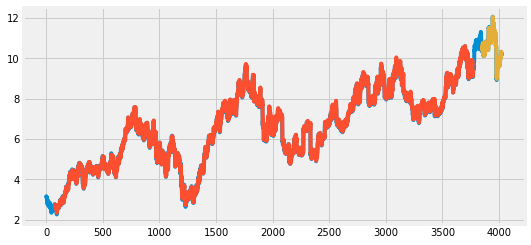

In [ ]:
# Plotting 
# shift train predictions for plotting
time_steps=75           # time step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(train_predict)+time_steps, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_steps*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# complete data set - blue
# train data - red
# predicted o/p for test data - yellow

### Predicting on unseen data

In [ ]:
len(test_data)

252

In [ ]:
252-75

177

In [ ]:
# taking previous 75 days from the last record

x_input = test_data[177:].reshape(1,-1)
x_input.shape

(1, 75)

In [ ]:
# converting to list

temp_input = list(x_input)
temp_input

[array([0.96940434, 0.96838448, 0.95920579, 0.96226535, 0.9520668 ,
        0.92657041, 0.89087548, 0.8949549 , 0.89699461, 0.9041336 ,
        0.91229244, 0.92861012, 0.8949549 , 0.89903432, 0.90719316,
        0.91331229, 0.92045128, 0.90311374, 0.90719316, 0.90923287,
        0.88781591, 0.85212097, 0.85722025, 0.85008126, 0.84906141,
        0.8470217 , 0.71648021, 0.68792426, 0.69098383, 0.67976542,
        0.70730151, 0.70322209, 0.71851992, 0.71953978, 0.74707587,
        0.73993688, 0.76441341, 0.76033399, 0.77665168, 0.79092965,
        0.75625457, 0.76747298, 0.76339356, 0.75931414, 0.77563182,
        0.77461197, 0.77461197, 0.7715524 , 0.7807311 , 0.77563182,
        0.74809573, 0.77563182, 0.753195  , 0.76645312, 0.7715524 ,
        0.75727442, 0.75523471, 0.77461197, 0.77767153, 0.78277081,
        0.78277081, 0.79296936, 0.79602893, 0.79194951, 0.79704878,
        0.80214806, 0.81846575, 0.82254517, 0.81642604, 0.81846575,
        0.81846575, 0.81336647, 0.80622748, 0.81

In [ ]:
temp_input = temp_input[0].tolist()
temp_input[0] # showing 1st element of list

0.9694043391989974

In [ ]:
len(temp_input)

75

In [ ]:
temp_input      # test_data values -> previous 75 days

[0.9694043391989974,
 0.968384483838964,
 0.9592057855986632,
 0.9622653516787635,
 0.9520667980784293,
 0.9265704140775938,
 0.8908754764764243,
 0.8949548979165577,
 0.8969946086366248,
 0.9041335961568587,
 0.912292439037126,
 0.9286101247976607,
 0.8949548979165577,
 0.8990343193566915,
 0.907193162236959,
 0.9133122943971596,
 0.9204512819173932,
 0.9031137407968252,
 0.907193162236959,
 0.9092328729570257,
 0.887815910396324,
 0.8521209727951543,
 0.8572202495953213,
 0.8500812620750874,
 0.849061406715054,
 0.8470216959949871,
 0.7164802099107095,
 0.6879242598297739,
 0.6909838259098741,
 0.6797654169495065,
 0.7073015116704088,
 0.7032220902302752,
 0.7185199206307765,
 0.7195397759908099,
 0.7470758707117121,
 0.7399368831914782,
 0.7644134118322803,
 0.7603339903921467,
 0.7766516761526815,
 0.7909296511931491,
 0.7562545689520129,
 0.7674729779123804,
 0.7633935564722468,
 0.7593141350321133,
 0.7756318207926479,
 0.7746119654326143,
 0.7746119654326143,
 0.7715523993525143

In [ ]:
# prediction for next 30 days

lst_output = []
n_steps = 75
i = 0
while(i<30):
    if(len(temp_input)>75):
        x_input = np.array(temp_input[1:])            # eliminate 1st value of temp_input
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = lstmmodel.predict(x_input, verbose=0)      # predict value of next day
        print("{} day output {}".format(i,yhat[0]))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = lstmmodel.predict(x_input, verbose=0)      # predict value of next day   
        print("Showing first output: ", yhat[0])
        temp_input.extend(yhat[0].tolist())
        print("Number of days: ", len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

print("The outputs are: ", lst_output)                # storing all predicted values for 30 days

Showing first output:  [0.8054503]
Number of days:  76
1 day input [0.96838448 0.95920579 0.96226535 0.9520668  0.92657041 0.89087548
 0.8949549  0.89699461 0.9041336  0.91229244 0.92861012 0.8949549
 0.89903432 0.90719316 0.91331229 0.92045128 0.90311374 0.90719316
 0.90923287 0.88781591 0.85212097 0.85722025 0.85008126 0.84906141
 0.8470217  0.71648021 0.68792426 0.69098383 0.67976542 0.70730151
 0.70322209 0.71851992 0.71953978 0.74707587 0.73993688 0.76441341
 0.76033399 0.77665168 0.79092965 0.75625457 0.76747298 0.76339356
 0.75931414 0.77563182 0.77461197 0.77461197 0.7715524  0.7807311
 0.77563182 0.74809573 0.77563182 0.753195   0.76645312 0.7715524
 0.75727442 0.75523471 0.77461197 0.77767153 0.78277081 0.78277081
 0.79296936 0.79602893 0.79194951 0.79704878 0.80214806 0.81846575
 0.82254517 0.81642604 0.81846575 0.81846575 0.81336647 0.80622748
 0.81540618 0.80520763 0.80545032]
1 day output [0.80711156]
2 day input [0.95920579 0.96226535 0.9520668  0.92657041 0.89087548 0.8

In [ ]:
# just taking days to represent in graph

day_new = np.arange(1,76)      # from test data previous 75 days
day_pred = np.arange(76,106)   # predicted future 30 days

In [ ]:
len(df)

4026

In [ ]:
4026-75

3951

Text(0.5, 1.0, '30 days prediction')

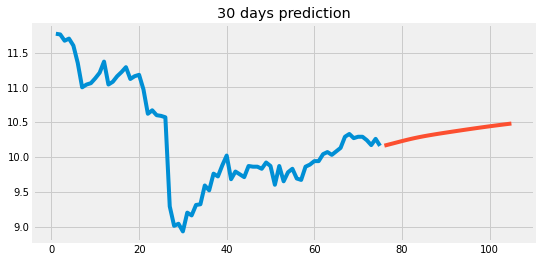

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[3951:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('30 days prediction')

In [ ]:
df

array([[0.08550845],
       [0.09188254],
       [0.0888549 ],
       ...,
       [0.80622748],
       [0.81540618],
       [0.80520763]])

In [ ]:
len(df)

4026

In [ ]:
lst_output

[[0.8054503202438354],
 [0.8071115612983704],
 [0.8087590932846069],
 [0.8104296922683716],
 [0.8120903372764587],
 [0.8136979937553406],
 [0.815223217010498],
 [0.8166500926017761],
 [0.8179762959480286],
 [0.8192087411880493],
 [0.820361316204071],
 [0.8214507699012756],
 [0.8224936723709106],
 [0.8235042691230774],
 [0.8244935274124146],
 [0.8254691362380981],
 [0.8264350891113281],
 [0.8273931741714478],
 [0.8283432126045227],
 [0.8292834162712097],
 [0.8302121758460999],
 [0.8311272263526917],
 [0.8320268988609314],
 [0.8329097628593445],
 [0.8337751030921936],
 [0.8346222639083862],
 [0.835451602935791],
 [0.8362630605697632],
 [0.8370570540428162],
 [0.8378342390060425]]

In [ ]:
df3 = df.tolist()
df3.extend(lst_output)
len(df3)

4056

In [ ]:
df3[3800:]

[[0.8755776460759229],
 [0.8765975014359563],
 [0.8725180799958226],
 [0.8674188031956555],
 [0.870478369275756],
 [0.8663989478356221],
 [0.8663989478356221],
 [0.8449819852749204],
 [0.8602798156754216],
 [0.8449819852749204],
 [0.8531408281551879],
 [0.8714982246357893],
 [0.8633393817555218],
 [0.8602798156754216],
 [0.8623195263954885],
 [0.8745577907158896],
 [0.8623195263954885],
 [0.8674188031956555],
 [0.8612996710354551],
 [0.8388628531147199],
 [0.8368231423946532],
 [0.8449819852749204],
 [0.8419224191948201],
 [0.8449819852749204],
 [0.8500812620750874],
 [0.8602798156754216],
 [0.8623195263954885],
 [0.8806769228760901],
 [0.8847563443162235],
 [0.8969946086366248],
 [0.8786372121560232],
 [0.8725180799958226],
 [0.8725180799958226],
 [0.8633393817555218],
 [0.8786372121560232],
 [0.8837364889561902],
 [0.9000541747167249],
 [0.9092328729570257],
 [0.9112725836770924],
 [0.8980144639966582],
 [0.9235108479974937],
 [0.9224909926374601],
 [0.9061733068769254],
 [0.89903431

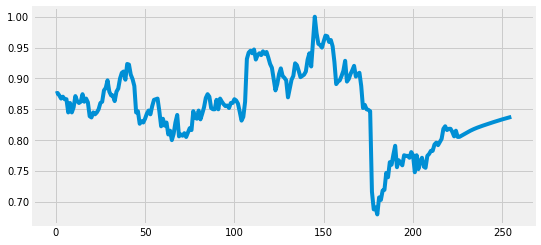

In [ ]:
plt.plot(df3[3800:])

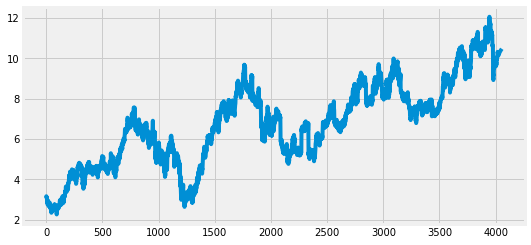

In [ ]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)

### Comparing predictions with real values of first 30 days of 2020

In [ ]:
!gdown https://drive.google.com/uc?id=1zUshPQmyAP7dfOgunrlFRAYNHRYq4mza

Downloading...
From: https://drive.google.com/uc?id=1zUshPQmyAP7dfOgunrlFRAYNHRYq4mza
To: /content/INFY_2020.csv
100% 13.0k/13.0k [00:00<00:00, 20.9MB/s]


In [ ]:
df4 = pd.read_csv('INFY_2020.csv', index_col='Date', parse_dates=True)
df4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-01,10.30,10.34,10.23,10.29,10.039379,5688000
2020-03-01,10.29,10.35,10.26,10.31,10.058892,6992200
2020-06-01,10.22,10.25,10.17,10.21,9.961328,10068900
2020-07-01,10.12,10.17,10.10,10.10,9.854008,10589100
2020-08-01,10.00,10.12,9.99,10.09,9.844251,13440400


In [ ]:
df4['Close'][0:30]

Date
2020-02-01    10.29
2020-03-01    10.31
2020-06-01    10.21
2020-07-01    10.10
2020-08-01    10.09
2020-09-01    10.48
2020-10-01    10.65
2020-01-13    10.88
2020-01-14    10.86
2020-01-15    10.85
2020-01-16    10.85
2020-01-17    10.88
2020-01-21    10.85
2020-01-22    11.04
2020-01-23    11.06
2020-01-24    11.03
2020-01-27    10.99
2020-01-28    11.10
2020-01-29    11.06
2020-01-30    11.06
2020-01-31    10.96
2020-03-02    10.94
2020-04-02    11.10
2020-05-02    11.04
2020-06-02    10.96
2020-07-02    10.85
2020-10-02    10.92
2020-11-02    10.95
2020-12-02    11.22
2020-02-13    11.10
Name: Close, dtype: float64

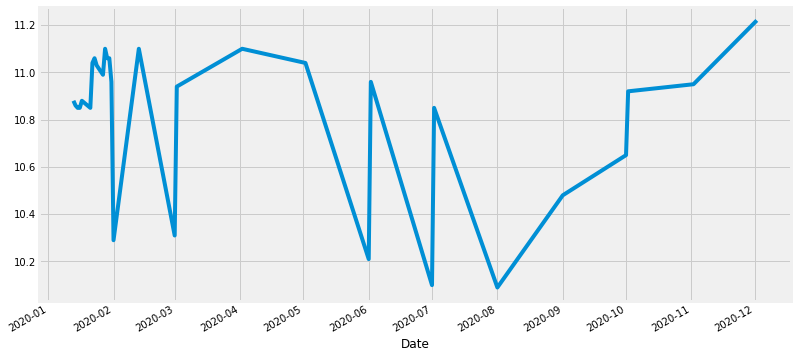

In [ ]:
df4['Close'][0:30].plot(figsize=(12,6))

In [ ]:
df3[-30:]

[[10.162379690490724],
 [10.178668677337647],
 [10.194823242492676],
 [10.211203986755372],
 [10.22748712918091],
 [10.243250702545167],
 [10.258205992431641],
 [10.272196952789308],
 [10.285200790374757],
 [10.297285300476075],
 [10.308586658111574],
 [10.319269091522218],
 [10.32949507562256],
 [10.339404292083742],
 [10.34910427825928],
 [10.358670427185059],
 [10.368141896484376],
 [10.377536219421389],
 [10.38685164266968],
 [10.396070632965088],
 [10.405177410369875],
 [10.414149766082765],
 [10.422971335723878],
 [10.431628092681885],
 [10.440113023651124],
 [10.448419699768067],
 [10.456551627685547],
 [10.464508222961427],
 [10.472293576690674],
 [10.479914117736818]]

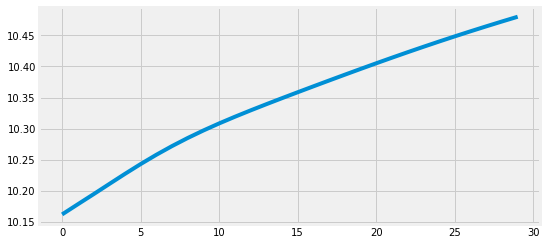

In [ ]:
plt.plot(df3[-30:])